# Questionario: Distância e Correlação

### Douglas Decicino de Andrade NUSP:10883512


In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Rede Hamsterster

## Calculo da média dos menores caminhos e o diâmetro

In [8]:
#Carregando os dados da rede.
G= nx.read_edgelist(r"C:\Users\dougl\Desktop\1ºsemestre 2021\Redes complexas\data\hamsterster.txt", nodetype=int, data=(('weight',float),))

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


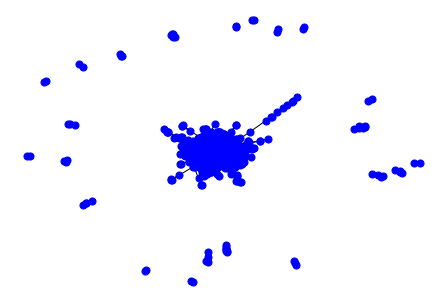

In [9]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Podemos ver acima que a rede possui muitos componentes, porém queremos pegar apenas o principal, sendo assim, o código abaixo extrai esse componente da rede para nós, assim como torna a rede não direcional.


In [11]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])#Selecionando apenas o maior componente

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


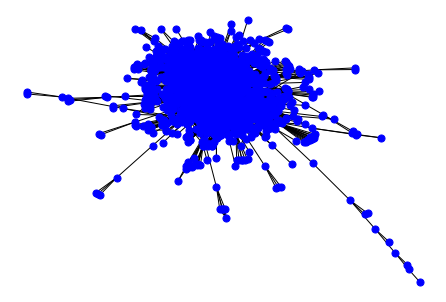

In [12]:
#Plot da rede com a maior componente apenas.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Segue abaixo o código para calcular o comprimento médio mais curto

In [13]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Comprimento médio do caminho mais curto:", "%3.4f"%l)
else:
    print("O gráfico tem mais de um componente conectado")

Comprimento médio do caminho mais curto: 3.4526


Logo o comprimento médio do menor caminho é 3.4526

Para o diametro temos a função

In [106]:
d = nx.diameter(G)
print('Diâmetro  da rede:', d)

Diâmetro  da rede: 14


E o diâmetro da rede é 14

# Rede USairport500

## Calculo da média e variância dos menores caminhos.

In [45]:
#Carregando os dados da rede.
G= nx.read_edgelist(r"C:\Users\dougl\Desktop\1ºsemestre 2021\Redes complexas\data\USairport500.txt", nodetype=int, data=(('weight',float),))

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


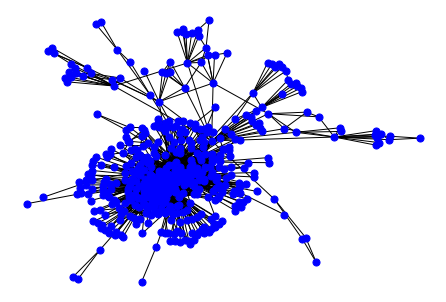

In [16]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Queremos pegar apenas o componente principal, sendo assim, o código abaixo extrai esse componente da rede para nós, assim como torna a rede não direcional.

In [46]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)

Segue abaixo o código para calcular a variancia e o comprimento médio dos caminhos mais curtos.

In [47]:
if nx.is_connected(G):
    D = np.zeros(shape=(N,N)) # D is the matrix of distances
    vl = []
    l = nx.average_shortest_path_length(G)
    print("Comprimento médio do caminho mais curto:", "%3.4f"%l)
    for i in np.arange(0,N):
        for j in np.arange(i+1, N):
            if i != j:
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    variancia =  np.var(vl)
    print("Variancia dos Comprimentos dos caminhos mais curto:", "%3.4f"%variancia)

Comprimento médio do caminho mais curto: 2.9910
Variancia dos Comprimentos dos caminhos mais curto: 0.8175


## Calculo da entropia de Shannon da distribuição dos menores caminhos.

Utilizando a funcão dada em aula para calcular  a entropia de Shannon.

In [21]:
#funcao auxiliar
def degree_distribution(U):
 maxk = np.max(vl)
 mink = np.min(vl)
 kvalues= np.arange(0,maxk+1)
 Pk = np.zeros(maxk+1)
 for k in vl:
    Pk[k] = Pk[k] + 1
 Pk = Pk/sum(Pk)
 return kvalues,Pk

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*np.math.log(p, 2)
    return H


logo a entropia de Shannon. é


In [24]:
D = np.zeros(shape=(N,N))
if nx.is_connected(G):# D is the matrix of distances
    vl = []
    for i in np.arange(0,N):
        for j in np.arange(i+1, N):
            if i != j:
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
H = shannon_entropy(G)
print("A entropia de Shannon = ", "%3.4f"%H)

A entropia de Shannon =  1.8837


# Rede Advogato

In [48]:
G= nx.read_edgelist(r"C:\Users\dougl\Desktop\1ºsemestre 2021\Redes complexas\data\advogato.txt", nodetype=int, data=(('weight',float),))

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


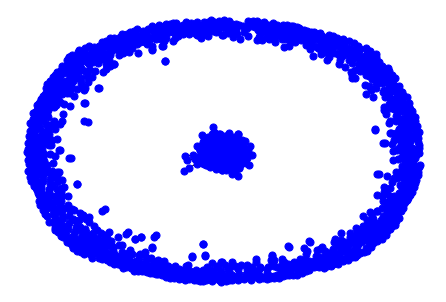

In [28]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Como podemos ver acima, a rede possui muitas componentes, por isso vamos seleiconar apenas a principal e plotar novamente.

In [49]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()

C:\Users\dougl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


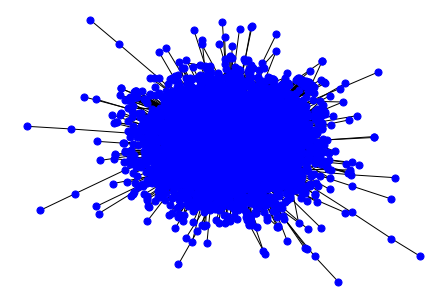

In [31]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

## Calculo do coeficiente de assortatividade

In [50]:
A=nx.degree_assortativity_coefficient(G)
print("assortatividade = ","%3.4f"%A)

assortatividade =  -0.0957


Assim a assortatividade é -.0957

# Rede word_adjacencies

# Calculo do coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau de cada vértice.

In [33]:
G= nx.read_edgelist(r"C:\Users\dougl\Desktop\1ºsemestre 2021\Redes complexas\data\word_adjacencies.txt", nodetype=int, data=(('weight',float),))

O grau médio de vizinhança da rede pode ser calculado por:

In [38]:
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("grau médio de vizinhança da rede:", "%3.2f"%np.mean(knn))

grau médio de vizinhança da rede: 14.76


In [40]:
#O grau de cada só
vk = dict(G.degree())
vk = list(vk.values())

Segue abaixo a correlação entre a conectividade média da vizinhança e o grau de rede sortida (entre k e knn). 

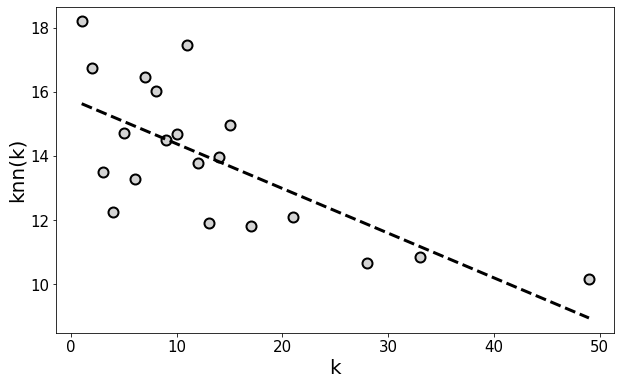

Coeficiente de correlação de Pearson: -0.7108322149352462


In [44]:
knnk = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if len(knn[aux]) > 0:
        av_knn = np.mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
fig= plt.figure(figsize=(10,6))

plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)", fontsize = 20)
plt.xlabel("k", fontsize = 20)
#plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

rho = np.corrcoef(ks, knnk)[0,1]
print('Coeficiente de correlação de Pearson:', rho)

Assim, o coeficiente de pearson é -0.7108